# Problem 1

**What to learn and what to predict?**
<br>
From the data provided by **Home Credit**, the purpose of this competition is to predict whether or not a client will repay a loan or have difficulties. There are seven data sources which can be learned by a ML model:
 - application_train/application_test: Containing information about each loan application at Home Credit. The training application data comes with the **TARGET** indicating 0: the loan was repaid or 1: the loan was not repaid.
 - bureau: data about client's previous credits from other financial institutions.
 - bureau_balance: monthly data about the previous credits in bureau. 
 - previous_application: previous applications for loans at Home Credit of clients who have loans in the application data.
 - POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit.
 - credit_card_balance: monthly data about previous credit cards clients have had with **Home Credit**.
 - installments_payment: payment history for previous loans at Home Credit.<br>

**What kind of file to create and submit to Kaggle?**
<br>
The submission include a csv file consisting two columns:
 - SK_ID_CURR: ID of loan in testing sample
 - TARGET: predicted probability of the accordingly testing sample. <br> 

**What kind of index value will be used to evaluate the submissions?**<br>
The submission is evaluated on **area under the ROC curve** between the predicted probability and the observed target.

# Problem 2

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
application_test = pd.read_csv('./HomeCreditCSV/application_test.csv')
application_train = pd.read_csv('./HomeCreditCSV/application_train.csv')
bureau = pd.read_csv('./HomeCreditCSV/bureau.csv')
bureau_balance = pd.read_csv('./HomeCreditCSV/bureau_balance.csv')
pop_cash_balance = pd.read_csv('./HomeCreditCSV/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('./HomeCreditCSV/credit_card_balance.csv')
installments_payments = pd.read_csv('./HomeCreditCSV/installments_payments.csv')
previous_application = pd.read_csv('./HomeCreditCSV/previous_application.csv')

Perform some analysis

In [3]:
# Check for missing data 
def null_check(data):
    total = data.isnull().sum()
    percent = (total / data.isnull().count() * 100)
    return pd.concat([total.sort_values(ascending=False),percent.sort_values(ascending=False)],axis=1,keys=['Total Null Values', 'Percent Missing'])

In [4]:
# Application Train
null_check(application_train).head(10)

,Total Null Values,Percent Missing
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [5]:
# Application test
null_check(application_test).head(10)

,Total Null Values,Percent Missing
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [6]:
# Bureau
null_check(bureau)

,Total Null Values,Percent Missing
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [7]:
# Bureau Balance
null_check(bureau_balance)

,Total Null Values,Percent Missing
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [8]:
# Pop cash balance
null_check(pop_cash_balance)

,Total Null Values,Percent Missing
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


In [9]:
# credit card balance
null_check(credit_card_balance)

,Total Null Values,Percent Missing
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [10]:
# installment payments
null_check(installments_payments)

,Total Null Values,Percent Missing
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


In [11]:
# Previous application
null_check(previous_application).head(10)

,Total Null Values,Percent Missing
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [12]:
def eda_plot(feature, rotated_label= False):
    temp = application_train[feature].value_counts()
    df = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    
    # Percentage of succesful repayment of each value of the feature
    s = application_train[[feature,'TARGET']]
    value = {}
    for x in s[feature].value_counts().index:
        total = s.loc[s[feature] == x].value_counts(normalize=True)
        value[x] = total[0] * 100
    l = pd.DataFrame.from_dict(value,orient='index',columns=['Percent of Successful Repayment'])
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    s = sns.barplot(ax=ax1, x = feature, y='Number of contracts',data=df)
    if (rotated_label):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s = sns.barplot(ax=ax2, x = l.index, y=l['Percent of Successful Repayment'])
    if (rotated_label):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

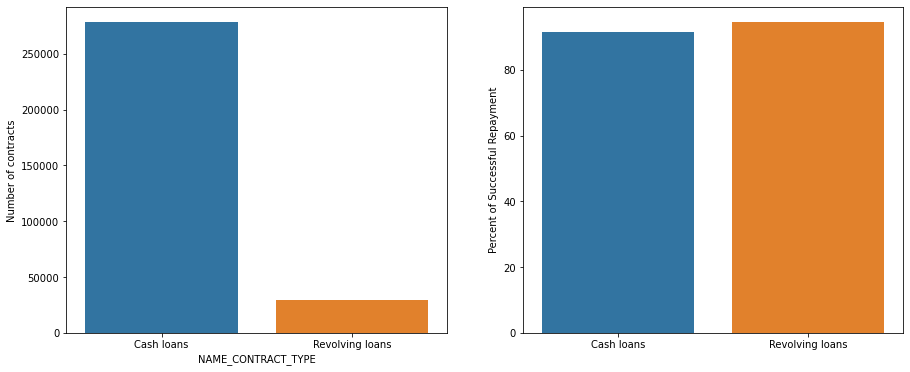

In [13]:
eda_plot('NAME_CONTRACT_TYPE')

There are many more cash loans than revolving loans in the applcation test file. However, the percentage of succesfull repayment of applicants having either one of the contract type are almost the same.

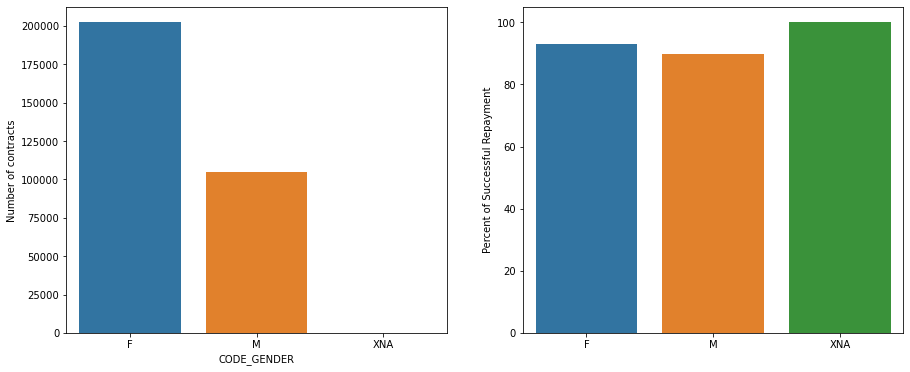

In [14]:
eda_plot('CODE_GENDER')

The number of female applicants is almost twice more than this of male. However, the percentage of repayment is approximately the same.

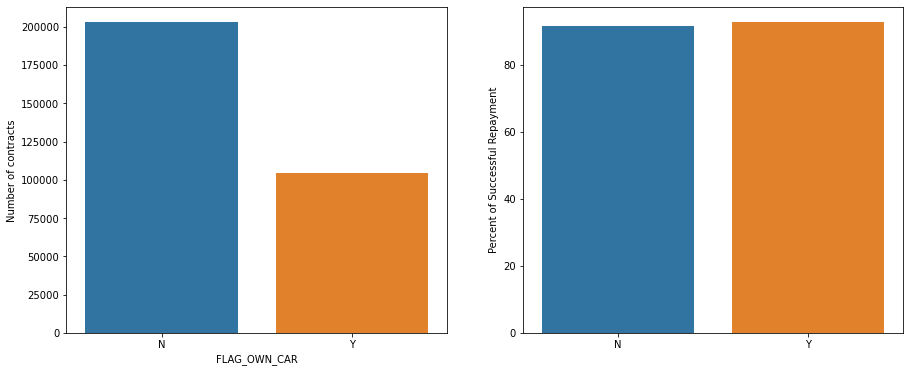

In [15]:
eda_plot('FLAG_OWN_CAR')

There majority of clients in the application_test own car. Percentage of successful repayment is though the same.

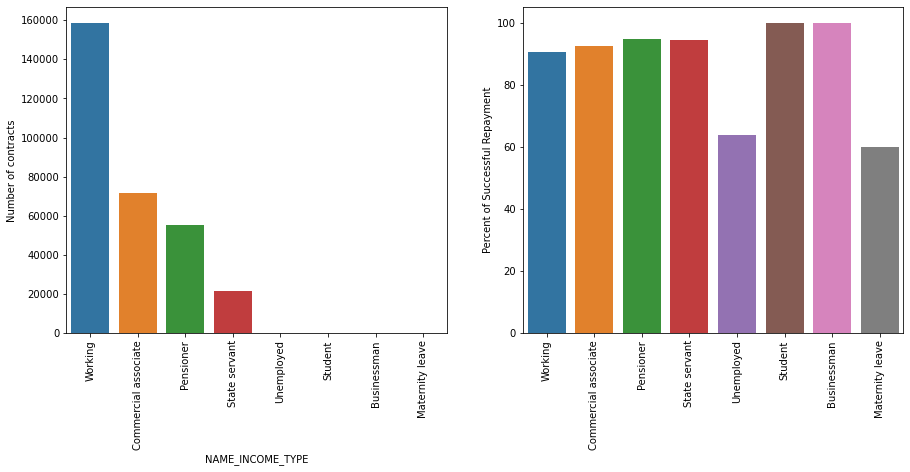

In [16]:
eda_plot('NAME_INCOME_TYPE',rotated_label=True)

Most of clients are working people while clients who are unemployed have the highest percent of not repaying the loan.

## Data Preprocessing

**Filling the missing value** 
<br>
For the categorical and discrete numerical variable, I fill the null value with the most frequent value. The continuos numerical variable will be filled with the median.

In [3]:
from sklearn.impute import SimpleImputer

def split_feature_type(data):
    categorical_list = []
    discrete_list = []
    continuos_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            categorical_list.append(i)
        elif data[i].nunique() < 20:
            discrete_list.append(i)
        else:
            continuos_list.append(i)
    return categorical_list, discrete_list, continuos_list

categorical_list, discrete_list, continuos_list = split_feature_type(application_train)
discrete_list.remove('TARGET')
# Imputing missing data by SimpleImputer 
application_train[categorical_list] = SimpleImputer(
    strategy='most_frequent').fit_transform(
    application_train[categorical_list])

application_train[discrete_list] = SimpleImputer(
    strategy='most_frequent').fit_transform(
    application_train[discrete_list])

application_train[continuos_list] = SimpleImputer(
    strategy='median').fit_transform(
    application_train[continuos_list])

application_test[categorical_list] = SimpleImputer(
    strategy='most_frequent').fit_transform(
    application_test[categorical_list])

application_test[discrete_list] = SimpleImputer(
    strategy='most_frequent').fit_transform(
    application_test[discrete_list])

application_test[continuos_list] = SimpleImputer(
    strategy='median').fit_transform(
    application_test[continuos_list])

In [18]:
null_check(application_train)

,Total Null Values,Percent Missing
SK_ID_CURR,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
WALLSMATERIAL_MODE,0,0.0
TOTALAREA_MODE,0,0.0
HOUSETYPE_MODE,0,0.0
...,...,...
LIVE_REGION_NOT_WORK_REGION,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
REG_REGION_NOT_LIVE_REGION,0,0.0
HOUR_APPR_PROCESS_START,0,0.0


In [19]:
null_check(application_test)

,Total Null Values,Percent Missing
SK_ID_CURR,0,0.0
COMMONAREA_MODE,0,0.0
EMERGENCYSTATE_MODE,0,0.0
WALLSMATERIAL_MODE,0,0.0
TOTALAREA_MODE,0,0.0
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.0
LIVE_REGION_NOT_WORK_REGION,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
REG_REGION_NOT_LIVE_REGION,0,0.0


**Coverting categorical variable to numerical** 

In [4]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
    categorical_cols = data.select_dtypes(include='object').columns
    for i in categorical_cols:
        encoder = LabelEncoder()
        data[i] = encoder.fit_transform(data[i])
label_encoder(application_train)
label_encoder(application_test)

## Training and verifiying the model

In [5]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [6]:
X_train = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y_train = application_train.TARGET
X_pred = application_test.drop(['SK_ID_CURR'], axis=1)

In [7]:
folds = StratifiedKFold(n_splits=5)
validation_pred = np.zeros(X_train.shape[0])
y_pred = np.zeros(X_pred.shape[0])

In [24]:
# LightGBM classifier, a gradient boosting model based on Decision Tree model, is the model
# used for learning. AUC is metric used for verification
import time
start = time.time()
valid_score = 0
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    train_x, train_y = X_train.iloc[trn_idx], y_train[trn_idx]
    validation_x, validation_y = X_train.iloc[val_idx], y_train[val_idx]    
    
    model_sk = lgb.LGBMClassifier(max_depth=7, learning_rate=0.05, min_split_gain=0.01, 
                                  early_stopping_rounds = 100, n_estimators= 2000,
                                  min_child_weight=40, num_leaves=24)
    
    
    model_sk.fit(train_x, train_y, early_stopping_rounds=100, 
                 eval_set = [(validation_x, validation_y)], eval_metric = 'auc', verbose = 200)
    # Estimation
    validation_pred[val_idx] = model_sk.predict(validation_x, num_iteration=model_sk.best_iteration_)
    y_pred += model_sk.predict(
        X_pred, num_iteration=model_sk.best_iteration_) / folds.n_splits
    print('Fold {}, AUC score: {}'.format(
        n_fold + 1, roc_auc_score(validation_y, validation_pred[val_idx])))
    valid_score += roc_auc_score(validation_y, validation_pred[val_idx])

print('mean of valid score: {}'.format(round(valid_score/folds.n_splits,4)))

end = time.time()
print('training time:', str(round((end - start)/60)), 'mins')

/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.758906	valid_0's binary_logloss: 0.245696
[400]	valid_0's auc: 0.761088	valid_0's binary_logloss: 0.245041
Early stopping, best iteration is:
[429]	valid_0's auc: 0.761188	valid_0's binary_logloss: 0.245001
Fold 1, AUC score: 0.5094514407816404


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.758823	valid_0's binary_logloss: 0.246122
[400]	valid_0's auc: 0.760491	valid_0's binary_logloss: 0.245647
Early stopping, best iteration is:
[424]	valid_0's auc: 0.76057	valid_0's binary_logloss: 0.245639
Fold 2, AUC score: 0.5117636498274059


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.752776	valid_0's binary_logloss: 0.247567
[400]	valid_0's auc: 0.753802	valid_0's binary_logloss: 0.247265
Early stopping, best iteration is:
[378]	valid_0's auc: 0.753863	valid_0's binary_logloss: 0.247234
Fold 3, AUC score: 0.5088329362010363


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.759178	valid_0's binary_logloss: 0.245951
[400]	valid_0's auc: 0.760642	valid_0's binary_logloss: 0.245545
Early stopping, best iteration is:
[422]	valid_0's auc: 0.760775	valid_0's binary_logloss: 0.245516
Fold 4, AUC score: 0.5105606108707145


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.759908	valid_0's binary_logloss: 0.245972
[400]	valid_0's auc: 0.76258	valid_0's binary_logloss: 0.245188
Early stopping, best iteration is:
[457]	valid_0's auc: 0.762776	valid_0's binary_logloss: 0.245123
Fold 5, AUC score: 0.5099175826911271
mean of valid score: 0.5101
training time: 3 mins


# Problem 3

In [25]:
output = pd.DataFrame({'SK_ID_CURR':np.int32(application_test.SK_ID_CURR), 'TARGET': y_pred})
output.to_csv('only_application_pred.csv', index=False)

My submission to **Kaggle** is scored 0.50361

![title](img/pic.png)

# Problem 4

**Feature selection**

In [23]:
from sklearn.feature_selection import SelectFromModel
lgbClassifier = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

lgb_selector = SelectFromModel(lgbClassifier, threshold='1.25*median')
lgb_selector.fit(X_train, y_train)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

In [24]:
lgb_selected_feature = X_train.loc[:,lgb_selector.get_support()].columns.tolist()
print('{} features are selected'.format(len(lgb_selected_feature)))

46 features are selected


In [25]:
# Perform training again
X_train_final = X_train[lgb_selected_feature]
X_pred_final = X_pred[lgb_selected_feature]

In [26]:
folds = StratifiedKFold(n_splits=5)
validation_pred = np.zeros(X_train_final.shape[0])
y_pred = np.zeros(X_pred.shape[0])

In [27]:
import time
start = time.time()
valid_score = 0
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X_train_final, y_train)):
    train_x, train_y = X_train_final.iloc[trn_idx], y_train[trn_idx]
    validation_x, validation_y = X_train_final.iloc[val_idx], y_train[val_idx]    
    
    model_sk = lgb.LGBMClassifier(max_depth=7, learning_rate=0.05, min_split_gain=0.01, 
                                  early_stopping_rounds = 100, n_estimators= 2000,
                                  min_child_weight=40, num_leaves=24)
    
    
    model_sk.fit(train_x, train_y, early_stopping_rounds=100, 
                 eval_set = [(validation_x, validation_y)], eval_metric = 'auc', verbose = 200)
    # Estimation
    validation_pred[val_idx] = model_sk.predict(validation_x, num_iteration=model_sk.best_iteration_)
    y_pred += model_sk.predict(
        X_pred_final, num_iteration=model_sk.best_iteration_) / folds.n_splits
    print('Fold {}, AUC score: {}'.format(
        n_fold + 1, roc_auc_score(validation_y, validation_pred[val_idx])))
    valid_score += roc_auc_score(validation_y, validation_pred[val_idx])

print('mean of valid score: {}'.format(round(valid_score/folds.n_splits,4)))

end = time.time()
print('training time:', str(round((end - start)/60)), 'mins')

/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.756667	valid_0's binary_logloss: 0.246431
[400]	valid_0's auc: 0.757919	valid_0's binary_logloss: 0.24598
Early stopping, best iteration is:
[392]	valid_0's auc: 0.758074	valid_0's binary_logloss: 0.245945
Fold 1, AUC score: 0.5090397774338655
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.756532	valid_0's binary_logloss: 0.246818
[400]	valid_0's auc: 0.758131	valid_0's binary_logloss: 0.246301
[600]	valid_0's auc: 0.758469	valid_0's binary_logloss: 0.246219
Early stopping, best iteration is:
[590]	valid_0's auc: 0.75851	valid_0's binary_logloss: 0.246204
Fold 2, AUC score: 0.511579927490381
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.749861	valid_0's binary_logloss: 0.248418
[400]	valid_0's auc: 0.750843	valid_0's binary_logloss: 0.248095
Early stopping, best iteration is:
[415]	valid_0's auc: 0.750954	valid_0's binary_logloss: 0.248061
Fold 3, AUC score: 0.5078258868556184
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.756889	valid_0's binary_logloss: 0.246605
[400]	valid_0's auc: 0.758139	valid_0's binary_logloss: 0.246259
Early stopping, best iteration is:
[490]	valid_0's auc: 0.758557	valid_0's binary_logloss: 0.246132
Fold 4, AUC score: 0.5096596867176485
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


/home/billdao/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.75743	valid_0's binary_logloss: 0.246556
[400]	valid_0's auc: 0.759682	valid_0's binary_logloss: 0.245901
[600]	valid_0's auc: 0.760079	valid_0's binary_logloss: 0.245738
Early stopping, best iteration is:
[637]	valid_0's auc: 0.760424	valid_0's binary_logloss: 0.245657
Fold 5, AUC score: 0.5106436282731975
mean of valid score: 0.5097
training time: 2 mins


In [20]:
output = pd.DataFrame({'SK_ID_CURR':np.int32(application_test.SK_ID_CURR), 'TARGET': y_pred})
output.to_csv('only_application_pred_new.csv', index=False)

For feature engineering, I have used <code>SelectFromModel</code>, a transformer for selecting features based on important weights. After fitting the transformer with the training dataset, I tried to pick out all the features whose important weights are greater than 1.25 times the median. 46 features are selected and fitted again to the **LGBMC Classifier**. **KFold** is used when splitting the data. However, the ROC AUC score at each iteration do not impove much. The mean of AUC score after five iterations is 0.5097, even less than before doing feature engineering, 0.5101. 